In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data_raw=pd.read_csv("Admission_Predict.csv")
data_raw.drop(['Serial No.'],axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
data_raw.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
data=data_raw.iloc[:,:-1]
y=data_raw.iloc[:,-1]

In [5]:
#data.describe().plot(kind="area",fontsize=18,figsize=(20,15),table=True,colormap="rainbow")

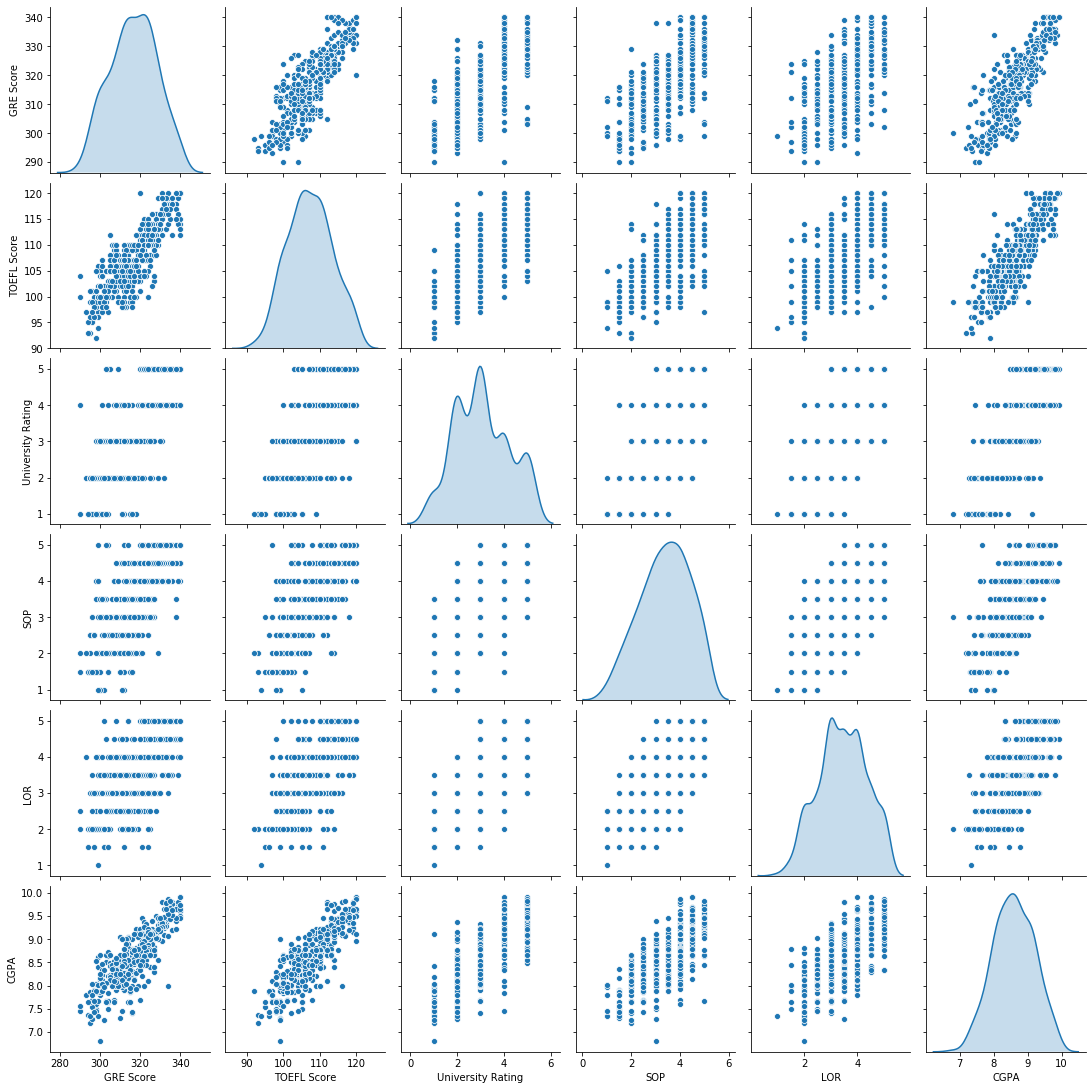

In [6]:
sn.pairplot(data_raw[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']],diag_kind='kde')

In [7]:
from sklearn.model_selection import train_test_split
data_train,data_test,y_train,y_test=train_test_split(data,y,test_size=0.2,shuffle=False)
y_train=np.array(y_train,dtype='float').reshape(data_train.shape[0],1)
y_test=np.array(y_test,dtype='float').reshape(data_test.shape[0],1)
print(y_train.shape)
print(y_test.shape)
print(data_train.shape)
print(data_test.shape)

(320, 1)
(80, 1)
(320, 8)
(80, 8)


In [8]:
def add_bias(data_array):
    return np.vstack((data_array,np.ones((1,data_array.shape[1]))))

In [9]:
def GD(w,x,y):
    w_old=w
    loss_hist=[loss_value(w,x,y)]
    
    for i in range(epochs):
        w=-x.dot(x.T.dot(w)-y)
        if np.linalg.norm(w-w_old)<1e-7:
            break
        loss_hist.append(loss_value(w,x,y))
        w_old=w
    return w,loss_hist

# Normalize data

In [10]:
train_statistic=data_train.describe().transpose()

def normalize_data(data):
    return (data-train_statistic['mean'])/train_statistic['std']

norm_data_train=np.array(normalize_data(data_train)).T
norm_data_test=np.array(normalize_data(data_test)).T

print(norm_data_train.shape)
print(norm_data_test.shape)

(8, 320)
(8, 80)


# Using Sklearn Library

In [11]:
from sklearn import linear_model
model=linear_model.LinearRegression()

## For Normalize Data

In [12]:
model.fit(norm_data_train.T,y_train)
w=model.coef_[0]
b=model.intercept_
print(w)
print(b)
y_predict_test=(norm_data_test.T.dot(w)+b).reshape(y_test.shape)
loss=y_predict_test-y_test
print("Loss value",np.sum(loss*loss,axis=0))

[ 0.02196523  0.02453894  0.02092365  0.01513434 -0.00242312  0.02311794
  0.05383242  0.01078121]
[0.7294375]
Loss value [0.38435086]


## For Raw Data

In [13]:
x_train=np.array(data_train)
x_test=np.array(data_test)
model.fit(x_train,y_train)
w1=model.coef_[0]
b1=model.intercept_
print(w1)
print(b1)
y_predict_test1=(x_test.dot(w1)+b1).reshape(y_test.shape)
loss1=y_predict_test1-y_test
print("Loss value",np.sum(loss1*loss1,axis=0))
print(y_test[:10,0].T)
print(y_predict_test1[:10,0].T)

[ 0.00023741  0.00216568  0.00350134  0.01314457 -0.00244942  0.02615665
  0.09242571  0.02163715]
[-1.30893919]
Loss value [0.38435086]
[0.75 0.73 0.72 0.62 0.67 0.81 0.63 0.69 0.8  0.43]
[0.75337032 0.7671319  0.71156226 0.62847333 0.68192919 0.88251731
 0.59446697 0.56038562 0.82953687 0.53737955]


# Using Gradient Decent

(9, 320)


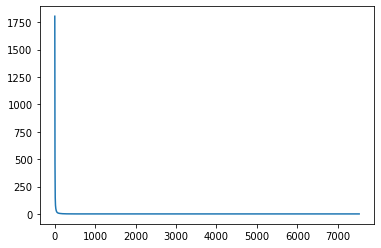

[0.75337032 0.7671319  0.71156226 0.62847333 0.68192919 0.88251731
 0.59446697 0.56038562 0.82953687 0.53737955]
[0.75 0.73 0.72 0.62 0.67 0.81 0.63 0.69 0.8  0.43]


In [27]:
n_epochs=100000
def loss_value(w,x,y):
    loss=y-x.T.dot(w)
    return np.sum(loss*loss,axis=0)
def GD(w_init,x,y,lamda):
    w=w_old=w_init
    loss_hist=[loss_value(w,x,y)]
    for i in range(n_epochs):
        w=w-lamda*x.dot(x.T.dot(w)-y)
        if np.linalg.norm(w-w_old)<1e-20:
            break
        loss_hist.append(loss_value(w,x,y))
        w_old=w
    return (w,loss_hist)

x_new_train=add_bias(norm_data_train)
print(x_new_train.shape)
w_init=np.random.rand(x_new_train.shape[0],1)
(w,loss_hist)=GD(w_init,x_new_train,y_train,0.0001)
plt.plot(np.arange(len(loss_hist)),loss_hist)
plt.show()
x_new_test=add_bias(norm_data_test)
y_predict_for_test=x_new_test.T.dot(w)
print(y_predict_test[:10,0].T)
print(y_test[:10,0].T)